Downloading the dataset

In [18]:
!kaggle datasets download -d subirbiswas19/skin-disease-dataset

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from zipfile import ZipFile

with ZipFile(r"C:\Users\MAHESH G\Downloads\archive (1).zip", "r") as zip_ref:
    zip_ref.extractall()


Checking no of images

In [3]:
import os

train_dir = r"C:\Users\MAHESH G\Downloads\archive (1)\skin-disease-datasaet\train_set"
total_train_images = 0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):  # optional: ensures it's a directory
        num_images = len(os.listdir(category_dir))
        total_train_images += num_images

print("Total no of training images:", total_train_images)


Total no of training images: 925


In [4]:
test_dir = r"C:\Users\MAHESH G\Downloads\archive (1)\skin-disease-datasaet\train_set"
total_test_images  =0

for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir , category)
  num_images = len(os.listdir(category_dir))
  total_test_images += num_images

print("Total no of test images: ", total_test_images)

Total no of test images:  925


Seeing some sample images

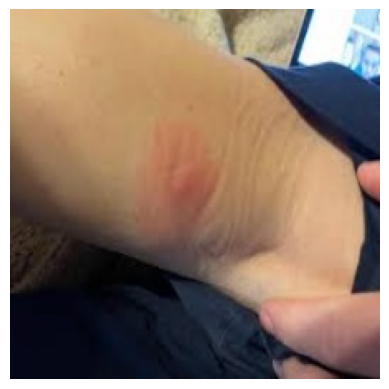

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = r"C:\Users\MAHESH G\Downloads\archive (1)\skin-disease-datasaet\train_set\BA- cellulitis\BA- cellulitis (86).jpg"
img = mpimg.imread(img_dir)
plt.imshow(img)
plt.axis("off")
plt.show()


In [6]:
print(img.shape)

(224, 224, 3)


Using Data Generators  - Helping in Data Augmentation

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale=1./255
)


In [8]:
#Defining the training set data generator

train_dir  =r"C:\Users\MAHESH G\Downloads\archive (1)\skin-disease-datasaet\train_set"

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size =(150, 150),
    class_mode="categorical",
    batch_size = 32
)

Found 924 images belonging to 8 classes.


In [9]:
#Defining the test set generator

test_dir = r"C:\Users\MAHESH G\Downloads\archive (1)\skin-disease-datasaet\train_set"

test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode="categorical",
    batch_size = 32
)

Found 924 images belonging to 8 classes.


Building the CNN

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))



model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(128, activation ="relu"))
model.add(Dropout(0.6))
model.add(Dense(8, activation="softmax"))

c:\Users\MAHESH G\Downloads\Skin-Disease-Prediction-main\Skin-Disease-Prediction-main\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,66

 Total params: 4,312,264 (16.45 MB)

 Trainable params: 4,309,512 (16.44 MB)

 Non-trainable params: 2,752 (10.75 KB)

Model Compiling

In [13]:
from keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])

Model Training

In [14]:
history  = model.fit(train_generator, epochs = 25, batch_size = 15, validation_data = test_generator)

c:\Users\MAHESH G\Downloads\Skin-Disease-Prediction-main\Skin-Disease-Prediction-main\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.1670 - loss: 4.8342 - val_accuracy: 0.0833 - val_loss: 2.1141
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.1835 - loss: 2.9347 - val_accuracy: 0.0974 - val_loss: 2.2139
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2328 - loss: 2.5428 - val_accuracy: 0.1407 - val_loss: 2.1038
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3017 - loss: 2.1355 - val_accuracy: 0.1407 - val_loss: 2.4607
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2794 - loss: 2.0729 - val_accuracy: 0.1288 - val_loss: 2.3880
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3273 - loss: 1.8858 - val_accuracy: 0.1407 - val_loss: 2.1303
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3767 - loss: 1.8510 - val_accuracy: 0.1407 - val_loss: 2.6596
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3743 - loss: 1.7613 - val_accuracy: 0.1991 - val_loss:

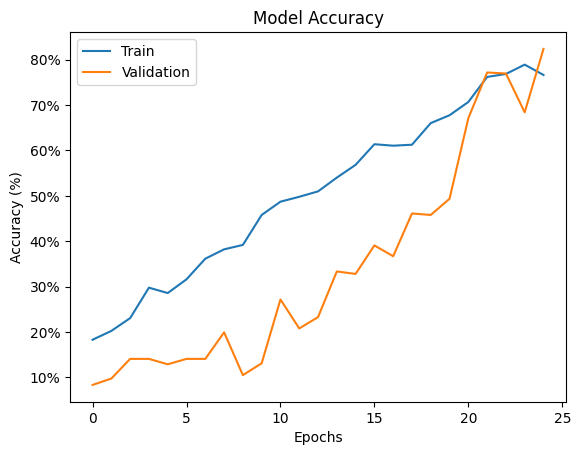

In [16]:
import matplotlib.ticker as mtick

# Plotting
plt.plot(train_acc)
plt.plot(val_acc)
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend(["Train", "Validation"])

# Format Y-axis to show percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


In [17]:
model.save("skin_disease_model.keras")